Process text from entire books
===

* This could be the first step of a possible final project  
* In a further step text could be analyzed   
* Books could be rated according to certain dimensions  
* Find the music with the most similar lyrics to a book  

In [ ]:
import jupyter_black

jupyter_black

## From PDF to Text

In [1]:
#
#
#

## From Ebook to Text

In [43]:
# find epub files

from glob import glob

epubs = glob("/home/user/Dropbox/calibre/**/*.epub", recursive=True)

In [60]:
from epub2txt import epub2txt
import os

books_dir = "data/books"

# idx of some books
idx = [8, 9, 11, 12, 13, 14, 15, 16, 17]


if os.path.exists(books_dir) == False:
    os.makedirs(books_dir)

for i in idx:
    try:
        filepath = epubs[i]
        title = os.path.basename(filepath)[:-5]
        res = epub2txt(filepath)
        with open(books_dir + "/" + title + ".txt", "w") as fo:
            fo.write(res)
    except Exception as e:
        print(f"couldn't convert {title}: {e}")

couldn't convert Slow Learner - Thomas Pynchon: Entity 'nbsp' not defined, line 11, column 87 (<string>, line 11)


## Books that were already converted to txt

<div class="alert alert-warning">It is probably a better idea to use calibre for the epub to txt conversion.</div>

In [62]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import contractions


books = glob(books_dir + "/*.txt")

books

["data/books/Gravity's rainbow - Thomas Pynchon.txt",
 'data/books/V_ - Thomas Pynchon.txt',
 'data/books/Against the Day - Thomas Pynchon.txt',
 'data/books/The crying of lot 49 - Thomas Pynchon.txt',
 'data/books/The Sound and the Fury - William Faulkner; David Minter.txt',
 'data/books/Bleeding Edge - Pynchon, Thomas.txt',
 'data/books/Inherent Vice - Thomas Pynchon.txt',
 'data/books/Mason & Dixon - Thomas Pynchon.txt']

In [65]:
books[4]

'data/books/The Sound and the Fury - William Faulkner; David Minter.txt'

In [166]:
books[2]

'data/books/Against the Day - Thomas Pynchon.txt'

In [169]:
with open(books[4], "r") as fo:
    book = fo.readlines()

print(f"{books[4]} has {len(book)} paragraphs.")

data/books/The Sound and the Fury - William Faulkner; David Minter.txt has 233 paragraphs.


In [170]:
with open(books[2], "r") as fo:
    book_atd = fo.readlines()

print(f"{books[2]} has {len(book_atd)} paragraphs.")

data/books/Against the Day - Thomas Pynchon.txt has 11389 paragraphs.


### Inspection
1. Novel starts at paragraph 58
2. There are meaningless numbers in the format "1.8" in between the text on single lines.
3. Each paragraph ends with `\n` which is not necessary here
4. There are entirely empty lines

#### 1.a Split more

In [171]:
# another paragraph split character?

spltchars = ["\xa0\xa0\xa0\xa0\xa0", "\xa0"]

# split further
for splch in spltchars:
    book = [a for b in [s.split(splch) for s in book] for a in b]
    book_atd = [a for b in [s.split(splch) for s in book_atd] for a in b]

print("book has", len(book), "paragraphs")
print("book_atd has", len(book_atd), "paragraphs")

book has 6859 paragraphs
book_atd has 11389 paragraphs


#### 1.b Trim

In [94]:
book[4:].index("The Sound and the Fury\n")

18

In [96]:
book[23]

'April 7, 1928'

In [181]:
book = book[23:]

In [178]:
book_atd = book_atd[30:]

#### 2. Remove meaningless numbers and 3. remove `\n`

*Example*

In [182]:
book[22]

'1.8"Do you think buzzards are going to undress Damuddy." Caddy said. "You\'re crazy." "You\'re a skizzard." Jason said. He began to cry. "You\'re a knobnut." Caddy said. Jason cried. His hands were in his pockets. "Jason going to be rich man." Versh said. "He holding his money all the time." Jason cried. "Now you\'ve got him started." Caddy said. "Hush up, Jason. How can buzzards get in where Damuddy is. Father wouldn\'t let them. Would you let a buzzard undress you. Hush up, now." Jason hushed. "Frony said it was a funeral." he said. "Well it\'s not." Caddy said. "It\'s a party. Frony dont know anything about it. He wants your lightning bugs, T.P. Let him hold it a while." T.P. gave me the bottle of lightning bugs. "I bet if we go around to the parlor window we can see something." Caddy said. "Then you\'ll believe me." "I already knows." Frony said. "I dont need to see. "You better hush your mouth, Frony." Versh said. "Mammy going whip you." "What is it." Caddy said. "I knows what I 

In [183]:
book[0]

'April 7, 1928'

In [184]:
rm_pattern_1 = "^[0-9]*\.[0-9]*\\n$"
rm_pattern_2 = "\\n$"

for i, _ in enumerate(book):
    book[i] = re.sub(rm_pattern_1, "", book[i])
    book[i] = re.sub(rm_pattern_2, "", book[i])

*Example*

In [185]:
book[22]

'1.8"Do you think buzzards are going to undress Damuddy." Caddy said. "You\'re crazy." "You\'re a skizzard." Jason said. He began to cry. "You\'re a knobnut." Caddy said. Jason cried. His hands were in his pockets. "Jason going to be rich man." Versh said. "He holding his money all the time." Jason cried. "Now you\'ve got him started." Caddy said. "Hush up, Jason. How can buzzards get in where Damuddy is. Father wouldn\'t let them. Would you let a buzzard undress you. Hush up, now." Jason hushed. "Frony said it was a funeral." he said. "Well it\'s not." Caddy said. "It\'s a party. Frony dont know anything about it. He wants your lightning bugs, T.P. Let him hold it a while." T.P. gave me the bottle of lightning bugs. "I bet if we go around to the parlor window we can see something." Caddy said. "Then you\'ll believe me." "I already knows." Frony said. "I dont need to see. "You better hush your mouth, Frony." Versh said. "Mammy going whip you." "What is it." Caddy said. "I knows what I 

In [186]:
book[0]

'April 7, 1928'

#### 4. Remove empty lines

*Before*

In [187]:
for p in book[:7]:
    print(p)

April 7, 1928
Through the fence, between the curling flower spaces, I could see them hitting. They were coming toward where the flag was and I went along the fence. Luster was hunting in the grass by the flower tree. They took the flag out, and they were hitting. Then they put the flag back and they went to the table, and he hit and the other hit. Then they went on, and I went along the fence. Luster came away from the flower tree and we went along the fence and they stopped and we stopped and I looked through the fence while Luster was hunting in the grass. "Here, caddie." He hit. They went away across the pasture. I held to the fence and watched them going away. "Listen at you, now." Luster said. "Aint you something, thirty three years old, going on that way. After I done went all the way to town to buy you that cake. Hush up that moaning. Aint you going to help me find that quarter so I can go to the show tonight." They were hitting little, across the pasture. I went back along the 

*After*

In [188]:
book_trimmed = [p for p in book if p != ""]
book_atd_trimmed = [p for p in book_atd if p != ""]


for p in book_trimmed[:3]:
    print(p)

April 7, 1928
Through the fence, between the curling flower spaces, I could see them hitting. They were coming toward where the flag was and I went along the fence. Luster was hunting in the grass by the flower tree. They took the flag out, and they were hitting. Then they put the flag back and they went to the table, and he hit and the other hit. Then they went on, and I went along the fence. Luster came away from the flower tree and we went along the fence and they stopped and we stopped and I looked through the fence while Luster was hunting in the grass. "Here, caddie." He hit. They went away across the pasture. I held to the fence and watched them going away. "Listen at you, now." Luster said. "Aint you something, thirty three years old, going on that way. After I done went all the way to town to buy you that cake. Hush up that moaning. Aint you going to help me find that quarter so I can go to the show tonight." They were hitting little, across the pasture. I went back along the 

## Start analyzing the text

### Fix contractions & lower case

In [105]:
for i, _ in enumerate(book_trimmed):
    book_trimmed[i] = contractions.fix(book_trimmed[i]).lower()

In [189]:
for i, _ in enumerate(book_atd_trimmed):
    book_atd_trimmed[i] = contractions.fix(book_atd_trimmed[i]).lower()

### Tokenize paragraphs to sentences

In [190]:
import nltk
from copy import deepcopy

book_trimmed_tokenized = deepcopy(book_trimmed)
book_atd_trimmed_tokenized = deepcopy(book_atd_trimmed)


for i, p in enumerate(book_trimmed):
    book_trimmed_tokenized[i] = nltk.sent_tokenize(p)


for i, p in enumerate(book_atd_trimmed):
    book_atd_trimmed_tokenized[i] = nltk.sent_tokenize(p)

### Sentiment scores for sentences

In [191]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

<div class="alert alert-warning">Let's see what is the difference between computing the score over the individual sentences or for the whole paragraph. It seems that this is an absolute value that accumulates the longer a text. High scores for long texts can thus be misleading. Is there a relative measure? Dividing by number of words or sentences? That would be necessary to make valid comparisons. I.e. 2 books could have both positive scores, but one has higher scores. Could it be because of its length?</div>

#### One example paragraph

In [193]:
p_i = 3  # paragraph index

print("A) whole paragraph:\n")
print(book_trimmed[p_i])
print("=>", sid.polarity_scores(book_trimmed[p_i])["compound"])

print("\nB) single sentences:\n")
for sent in book_trimmed_tokenized[p_i]:
    print(sent)
    print("=>", sid.polarity_scores(sent)["compound"])

A) whole paragraph:

3.2"What is it." Caddy said "What are you trying to tell Caddy. Did they send him out, Versh." "Couldn't keep him in." Versh said. "He kept on until they let him go and he come right straight down here, looking through the gate." "What is it." Caddy said. "Did you think it would be Christmas when I came home from school. Is that what you thought. Christmas is the day after tomorrow. Santy Claus, Benjy. Santy Claus. Come on, let's run to the house and get warm." She took my hand and we ran through the bright rustling leaves. We ran up the steps and out of the bright cold, into the dark cold. Uncle Maury was putting the bottle back in the sideboard. He called Caddy. Caddy said, "Take him in to the fire, Versh. Go with Versh." she said. "I'll come in a minute." We went to the fire. Mother said, "Is he cold, Versh." "Nome." Versh said. "Take his overcoat and overshoes off." Mother said. "How many times do I have to tell you not to bring him into the house with his over

#### Across all paragraphs

* vader and textblob

In [194]:
from textblob import TextBlob

scores = []
scores_tb = []

for p in book_trimmed:
    scores.append(sid.polarity_scores(p)["compound"])
    scores_tb.append(TextBlob(p).sentiment.polarity)

In [195]:
scores_atd = []
scores_atd_tb = []

for p in book_atd_trimmed:
    scores_atd.append(sid.polarity_scores(p)["compound"])
    scores_atd_tb.append(TextBlob(p).sentiment.polarity)

##### Total score of this book

In [196]:
print("vader", np.sum(scores))
print("textblob", np.sum(scores_tb))

vader 16.605199999999996
textblob 51.820344014191065


In [197]:
print("vader", np.sum(scores_atd))
print("textblob", np.sum(scores_atd_tb))

vader 516.3006
textblob 593.3417873067626


##### Average score of this book

In [198]:
print("vader", np.mean(scores))
print("textblob", np.mean(scores_tb))

vader 0.004892516205067765
textblob 0.01526822157165323


In [199]:
print("vader", np.mean(scores_atd))
print("textblob", np.mean(scores_atd_tb))

vader 0.0454529976230302
textblob 0.052235389321838424


The book seems neutral according to the sentiment scores.

##### Most positive paragraph in the book

In [200]:
# vader
print(book_trimmed[np.argmax(scores)])
print("=>", np.max(scores))

1.3"If we go slow, it'll be dark when we get there." Quentin said. "I'm not going slow." Caddy said. We went up the hill, but Quentin didn't come. He was down at the branch when we got to where we could smell the pigs. They were grunting and snuffing in the trough in the comer. Jason came behind us, with his hands in his pockets. Roskus was milking the cow in the barn door. 10.1The cows came jumping out of the barn."Go on." T.P. said. "Holler again. I going to holler myself. Whooey." Quentin kicked T.P. again. He kicked T.P. into the trough where the pigs ate and T.P. lay there. "Hot dog." T.P. said. "Didn't he get me then. You see that white man kick me that time. Whooey." I wasn't crying, but I couldn't stop. I wasn't crying, but the ground wasn't still, and then I was crying. The ground kept sloping up and the cows ran up the hill. T.P. tried to get up. He fell down again and the cows ran down the hill. Quentin held my arm and we went toward the barn. Then the barn wasn't there and 

In [124]:
# textblob
print(book_trimmed[np.argmax(scores_tb)])
print("=>", np.max(scores_tb))

 "i did my best to deliver it," he says. "i tried the store twice and called up your house, but they did not know where you were," he says, digging in the drawer. 
=> 1.0


##### Most negative paragraph in the book

In [125]:
# vader
print(book_trimmed[np.argmin(scores)])
print("=>", np.min(scores))

what have i done to have been given children like these benjamin was punishment enough and now for her to have no more regard for me her own mother i have suffered for her dreamed and planned and sacrificed i went down into the valley yet never since she opened her eyes has she given me one unselfish thought at times i look at her i wonder if she can be my child except jason he has never given me one moment's sorrow since i first held him in my arms i knew then that he was to be my joy and my salvation i thought that benjamin was punishment enough for any sins i have committed i thought he was my punishment for putting aside my pride and marrying a man who held himself above me i do not complain i loved him above all of them because of it because my duty though jason pulling at my heart all the while but i see now that i have not suffered enough i see now that i must pay for your sins as well as mine what have you done what sins have your high and mighty people visited upon me but you 

In [126]:
# textblob
print(book_trimmed[np.argmin(scores_tb)])
print("=>", np.min(scores_tb))

 "you would be too brutal with her," she says. "you have your uncle maury's temper." 
=> -0.875


<div class="alert alert-warning">With respect to what I wrote before about the sentiment score I am not surprised that both examples are very long paragraphs.</div>

##### How the score develops throughout the book

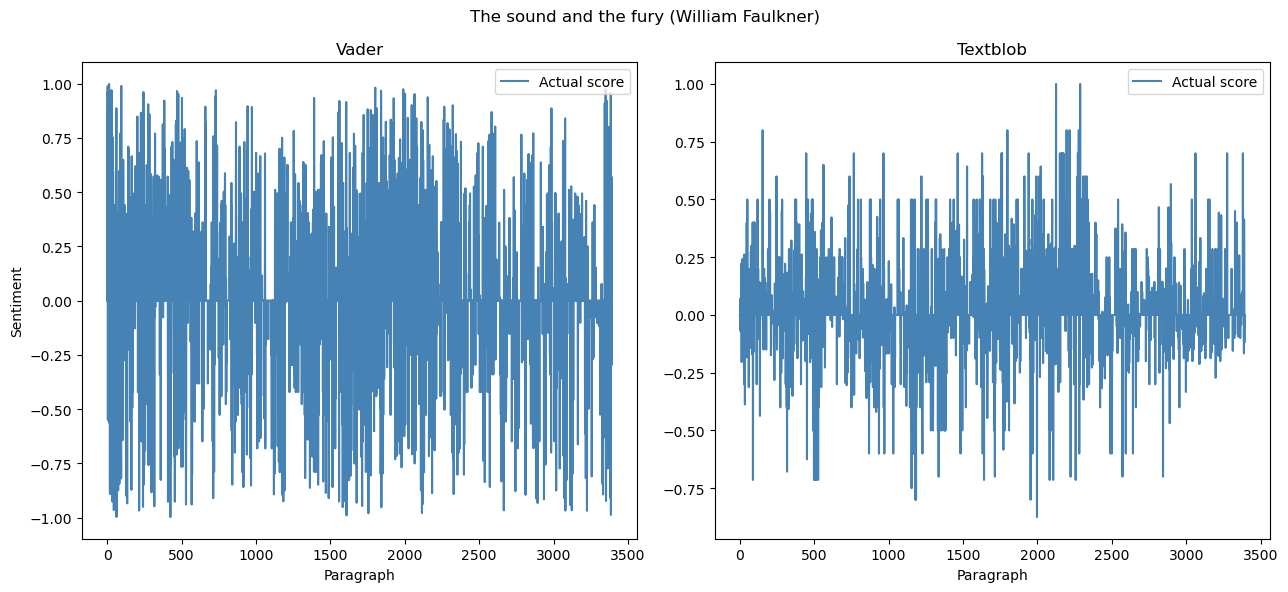

In [202]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].plot(scores, color="steelblue", label="Actual score")
axs[0].set_title("Vader")
axs[0].set_ylabel("Sentiment")
axs[0].set_xlabel("Paragraph")
axs[0].legend()

axs[1].plot(scores_tb, color="steelblue", label="Actual score")
axs[1].set_title("Textblob")
# axs[1].set_ylabel("Sentiment")
axs[1].set_xlabel("Paragraph")
axs[1].legend()

fig.suptitle("The sound and the fury (William Faulkner)")
fig.tight_layout();

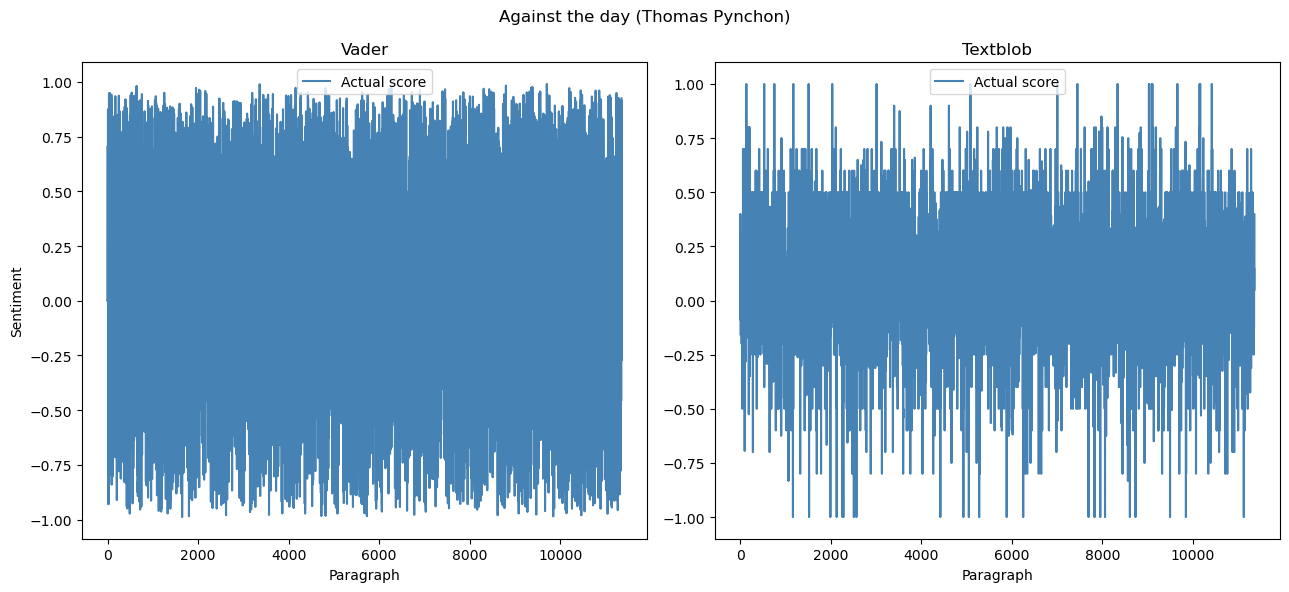

In [203]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].plot(scores_atd, color="steelblue", label="Actual score")
axs[0].set_title("Vader")
axs[0].set_ylabel("Sentiment")
axs[0].set_xlabel("Paragraph")
axs[0].legend()

axs[1].plot(scores_atd_tb, color="steelblue", label="Actual score")
axs[1].set_title("Textblob")
# axs[1].set_ylabel("Sentiment")
axs[1].set_xlabel("Paragraph")
axs[1].legend()

fig.suptitle("Against the day (Thomas Pynchon)")
fig.tight_layout();

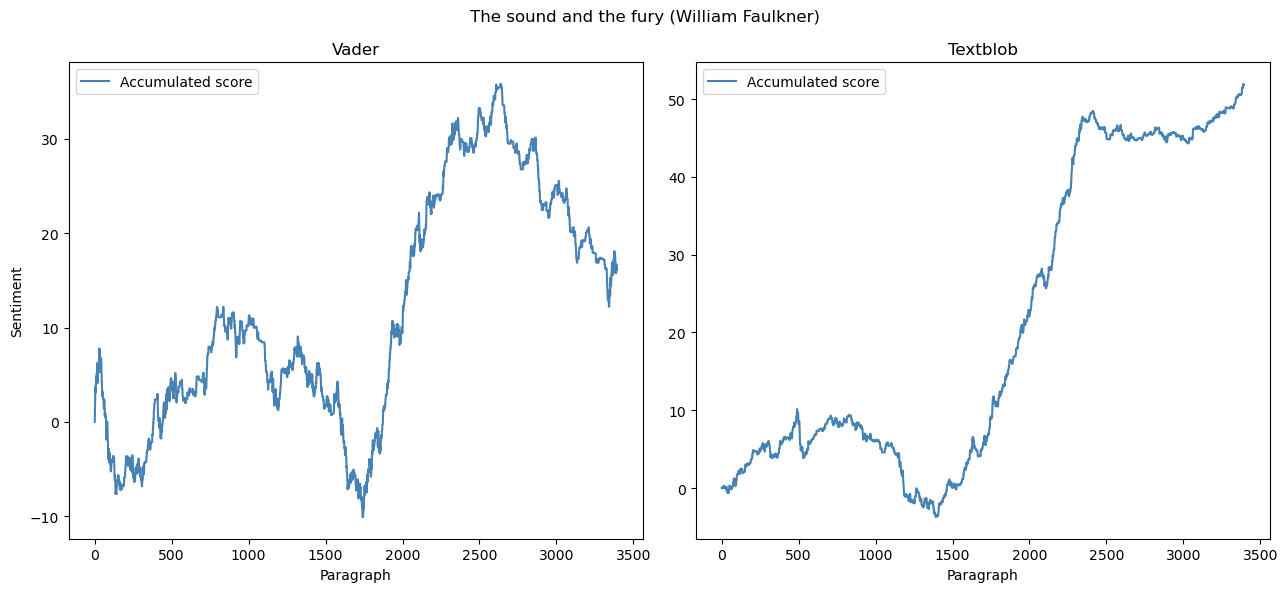

In [204]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].plot(np.cumsum(scores), color="steelblue", label="Accumulated score")
axs[0].set_title("Vader")
axs[0].set_ylabel("Sentiment")
axs[0].set_xlabel("Paragraph")
axs[0].legend()

axs[1].plot(np.cumsum(scores_tb), color="steelblue", label="Accumulated score")
axs[1].set_title("Textblob")
# axs[1].set_ylabel("Sentiment")
axs[1].set_xlabel("Paragraph")
axs[1].legend()

fig.suptitle("The sound and the fury (William Faulkner)")
fig.tight_layout();

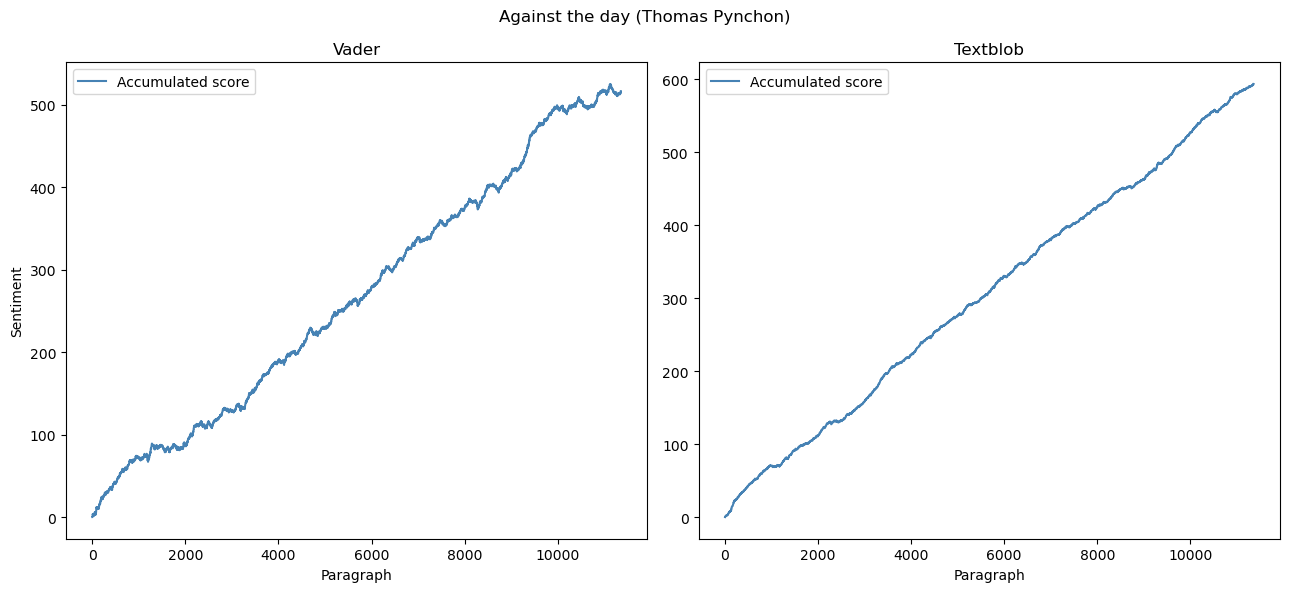

In [205]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].plot(np.cumsum(scores_atd), color="steelblue", label="Accumulated score")
axs[0].set_title("Vader")
axs[0].set_ylabel("Sentiment")
axs[0].set_xlabel("Paragraph")
axs[0].legend()

axs[1].plot(np.cumsum(scores_atd_tb), color="steelblue", label="Accumulated score")
axs[1].set_title("Textblob")
# axs[1].set_ylabel("Sentiment")
axs[1].set_xlabel("Paragraph")
axs[1].legend()

fig.suptitle("Against the day (Thomas Pynchon)")
fig.tight_layout();

Moving average smoothens the score curve

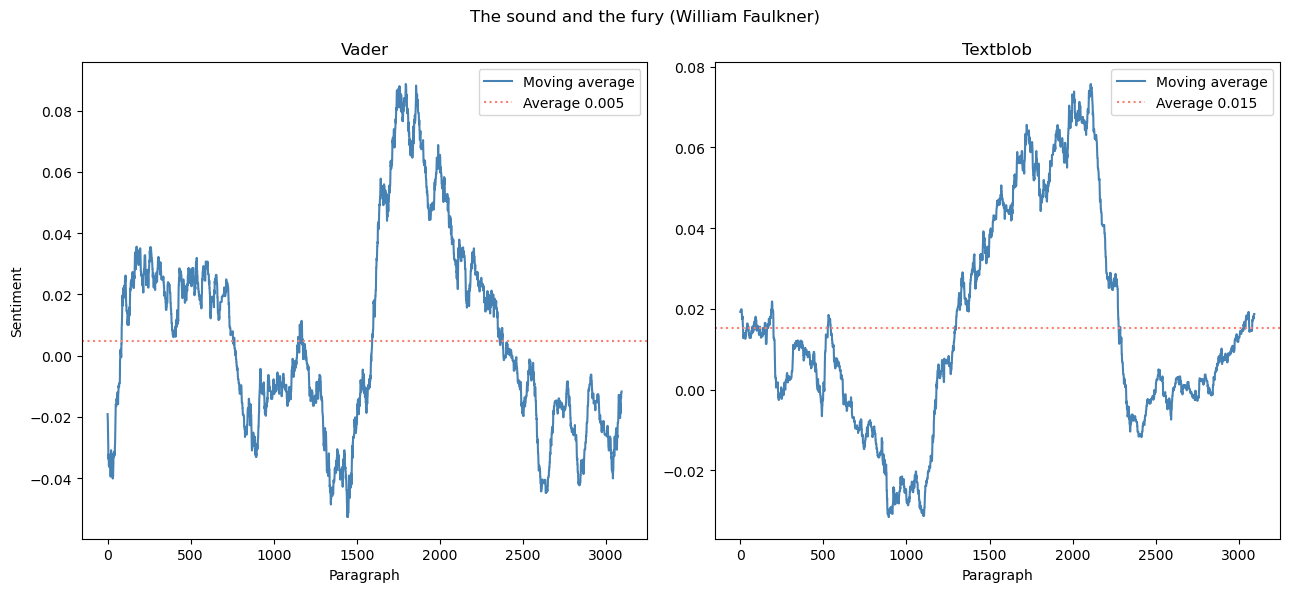

In [206]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), "valid") / w


window = 300  # smoothness of convolution
window_tb = 300  # smoothness of convolution


fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].plot(moving_average(scores, window), color="steelblue", label="Moving average")
axs[0].axhline(
    np.mean(scores),
    label=f"Average {np.mean(scores):.3f}",
    color="salmon",
    linestyle=":",
)
axs[0].set_title("Vader")
axs[0].set_ylabel("Sentiment")
axs[0].set_xlabel("Paragraph")
axs[0].legend()

axs[1].plot(
    moving_average(scores_tb, window_tb), color="steelblue", label="Moving average"
)
axs[1].axhline(
    np.mean(scores_tb),
    label=f"Average {np.mean(scores_tb):.3f}",
    color="salmon",
    linestyle=":",
)
axs[1].set_title("Textblob")
axs[1].set_xlabel("Paragraph")
axs[1].legend()

fig.suptitle("The sound and the fury (William Faulkner)")
fig.tight_layout();

Looks like we arrive emotionally to the first minimum around paragraph 700. There two more, one in the middle of the book and one close to the end.  

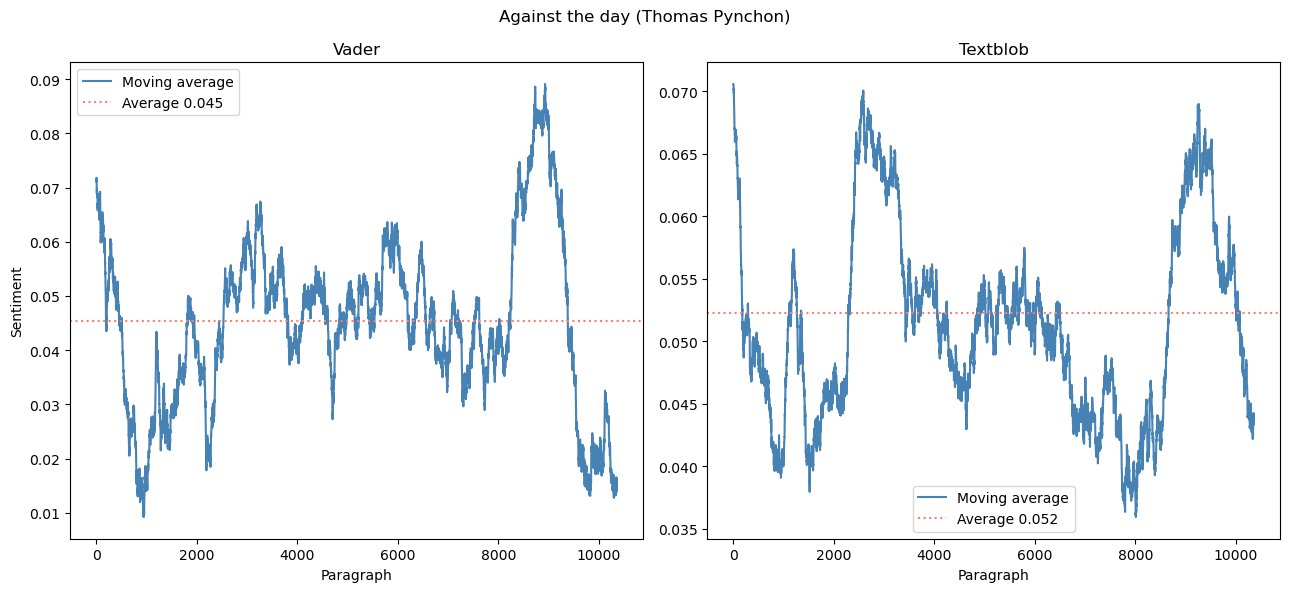

In [210]:
window = 1000  # smoothness of convolution
window_tb = 1000  # smoothness of convolution


fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].plot(
    moving_average(scores_atd, window), color="steelblue", label="Moving average"
)
axs[0].axhline(
    np.mean(scores_atd),
    label=f"Average {np.mean(scores_atd):.3f}",
    color="salmon",
    linestyle=":",
)
axs[0].set_title("Vader")
axs[0].set_ylabel("Sentiment")
axs[0].set_xlabel("Paragraph")
axs[0].legend()

axs[1].plot(
    moving_average(scores_atd_tb, window_tb), color="steelblue", label="Moving average"
)
axs[1].axhline(
    np.mean(scores_atd_tb),
    label=f"Average {np.mean(scores_atd_tb):.3f}",
    color="salmon",
    linestyle=":",
)
axs[1].set_title("Textblob")
axs[1].set_xlabel("Paragraph")
axs[1].legend()

fig.suptitle("Against the day (Thomas Pynchon)")
fig.tight_layout();